<a href="https://colab.research.google.com/github/mehrabopee/CSE445/blob/main/445.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
#from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import joblib

In [ ]:
# Load your dataset
df = pd.read_csv("dataset.csv").dropna(axis = 1)

In [ ]:
# Display the first few rows of the dataset
df.head()

,Gender,University,Year,Interest,Support,Visit Resource,Announcement Check,Class Participation,Attendence,Study Hours,Group Study,CGPA,Stress Level,class
0,Female,NSU,3rd,2,5,2,4,1,75-100,2,3,2.5-3,3,0
1,Male,NSU,4th,3,4,4,5,4,75-100,2,3,2.5-3,3,0
2,Male,NSU,4th,5,5,4,4,4,75-100,2,5,3.5+,0,1
3,Female,IUBAT,4th,4,4,5,5,1,75-100,2,4,3-3.5,4,1
4,Male,NSU,3rd,4,5,5,2,4,75-100,2,4,3-3.5,3,1


In [ ]:
# Check unique values in the 'class' column
df["class"].unique()

array([0, 1])

In [ ]:
sum(df["class"] == 0)

157

In [ ]:
sum(df["class"] == 1)

344

In [ ]:
# Visualize the distribution of features for each class
cols = df.columns.tolist()
cols.remove("class")
cols

['Gender',
 'University',
 'Year',
 'Interest',
 'Support',
 'Visit Resource',
 'Announcement Check',
 'Class Participation',
 'Attendence',
 'Study Hours',
 'Group Study',
 'CGPA',
 'Stress Level']

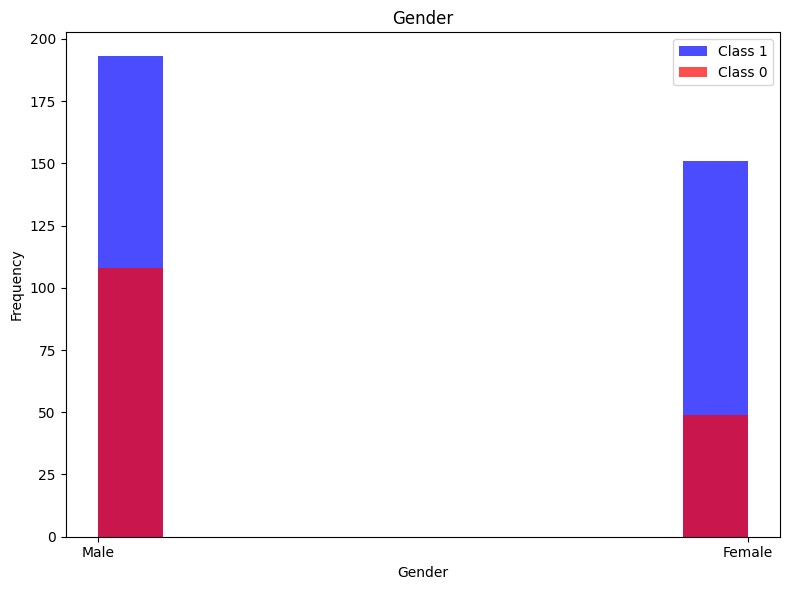

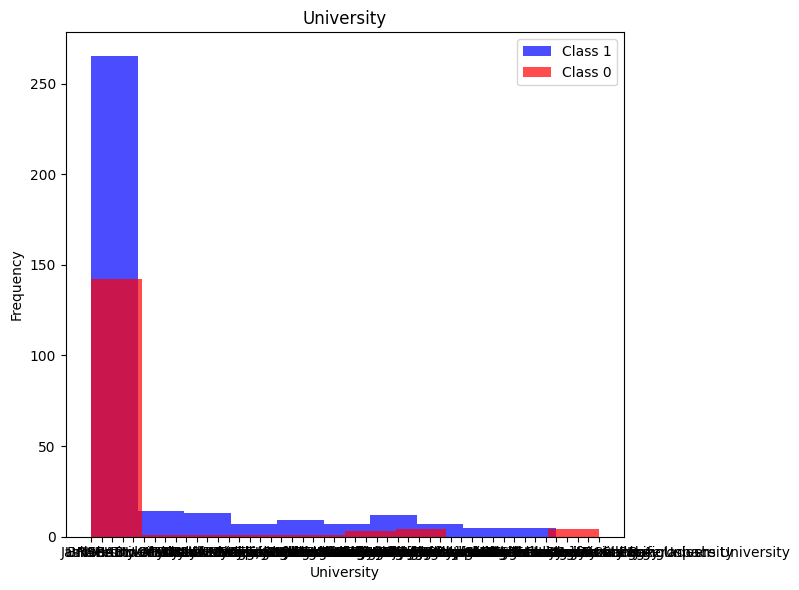

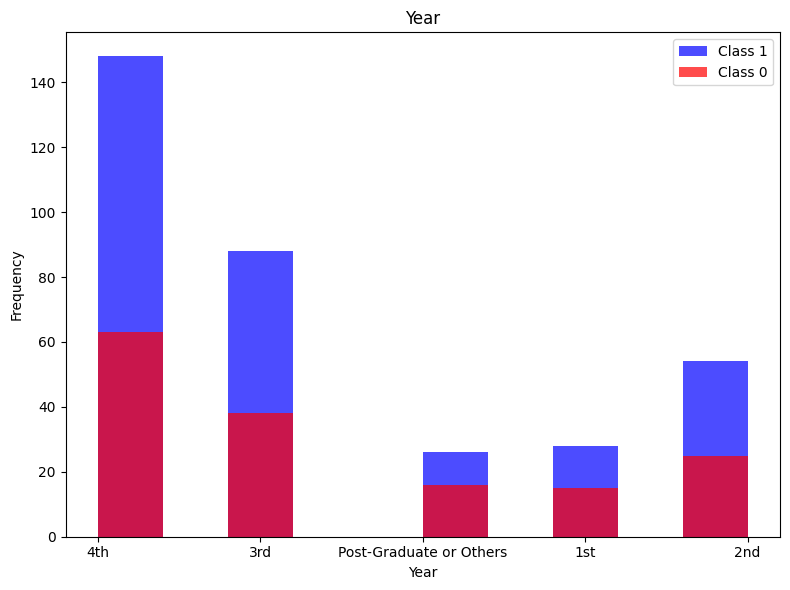

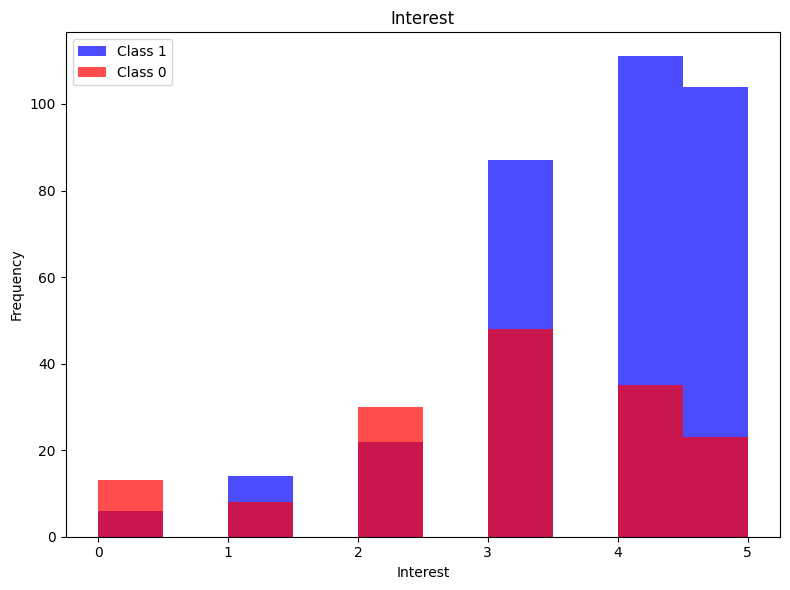

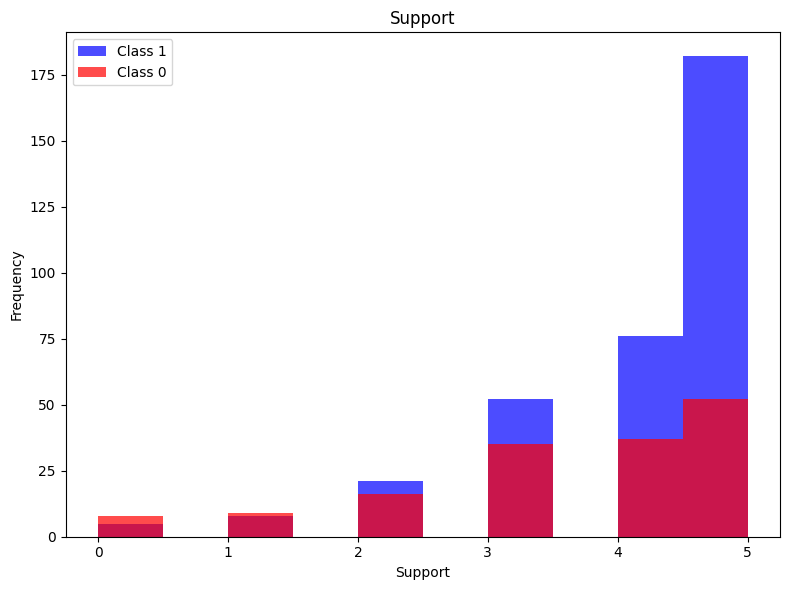

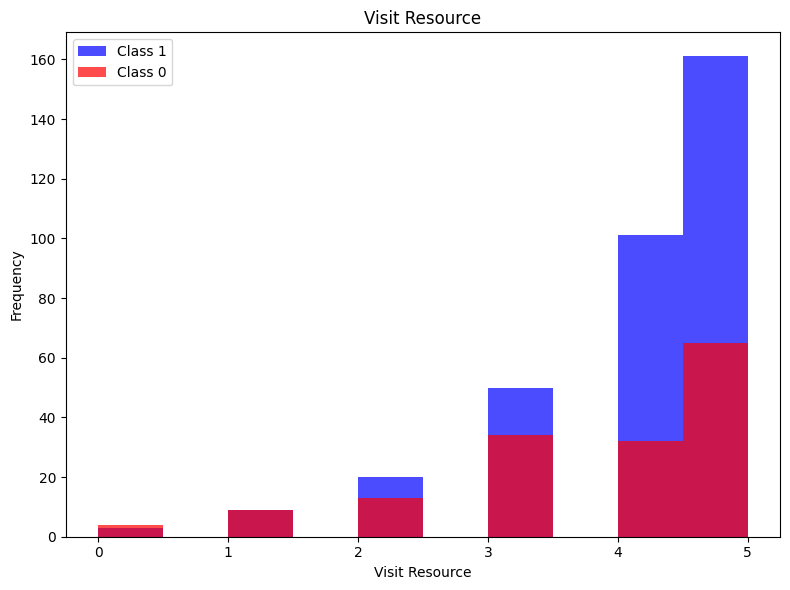

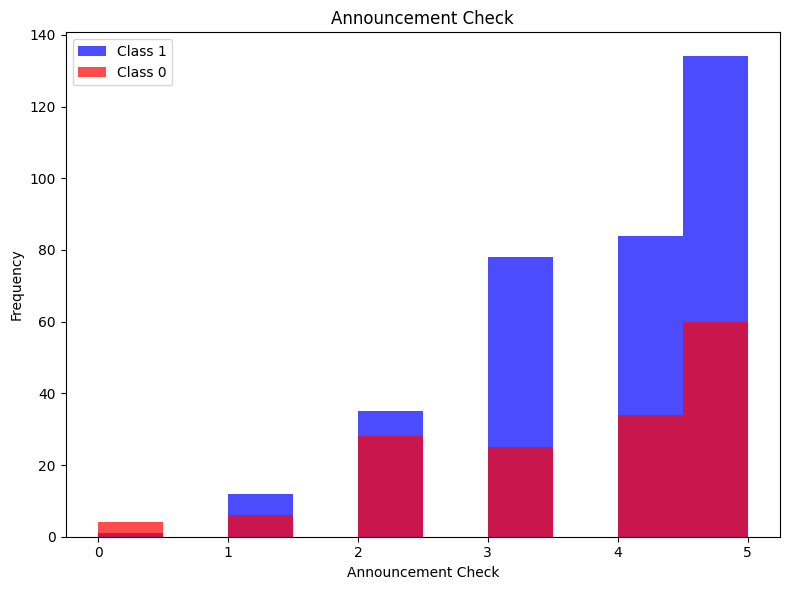

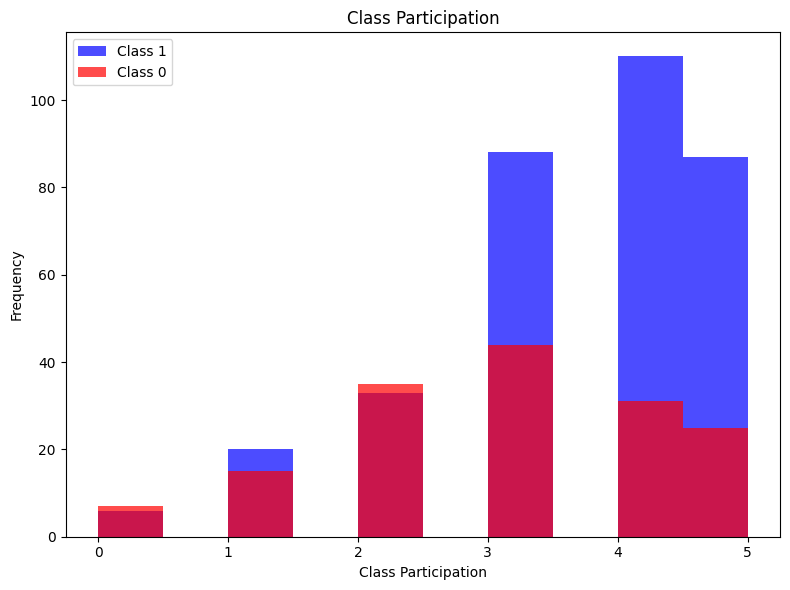

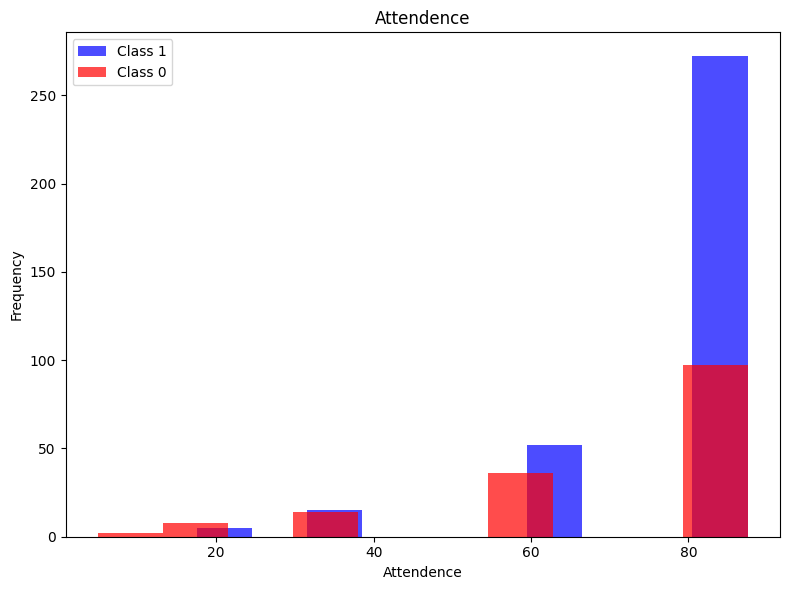

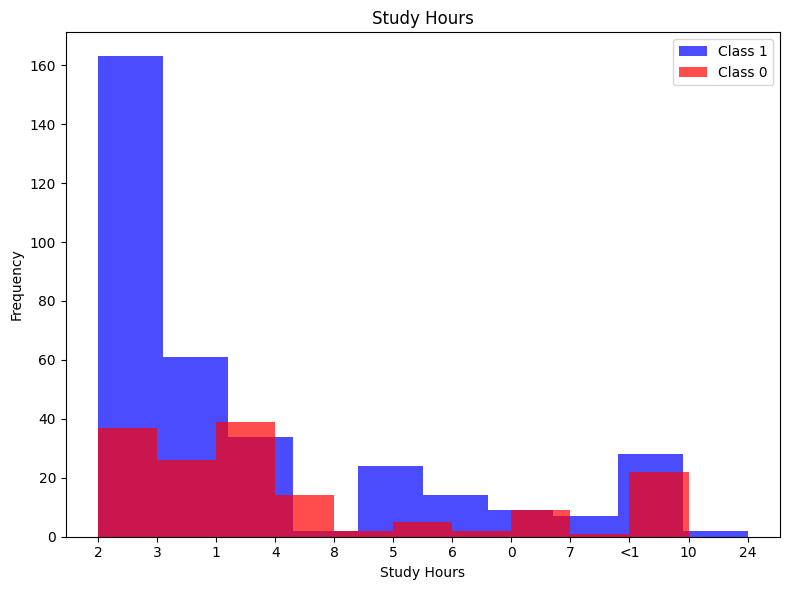

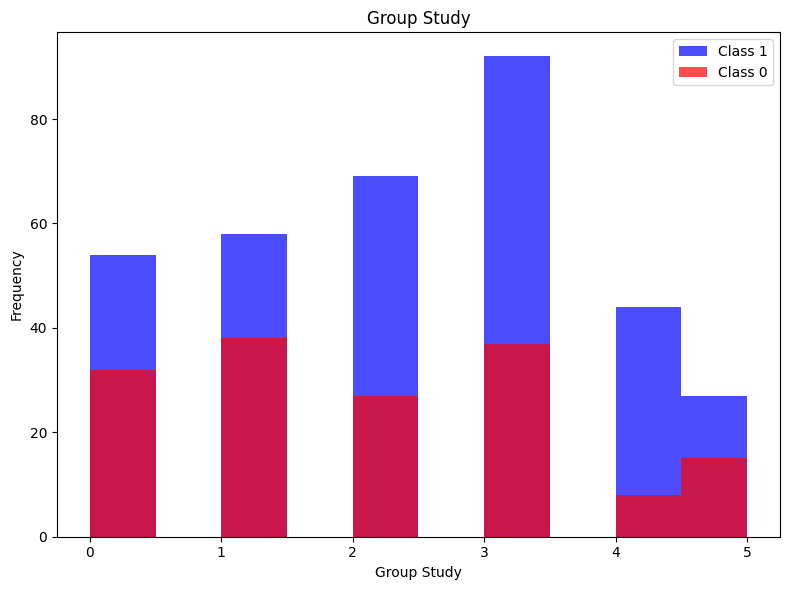

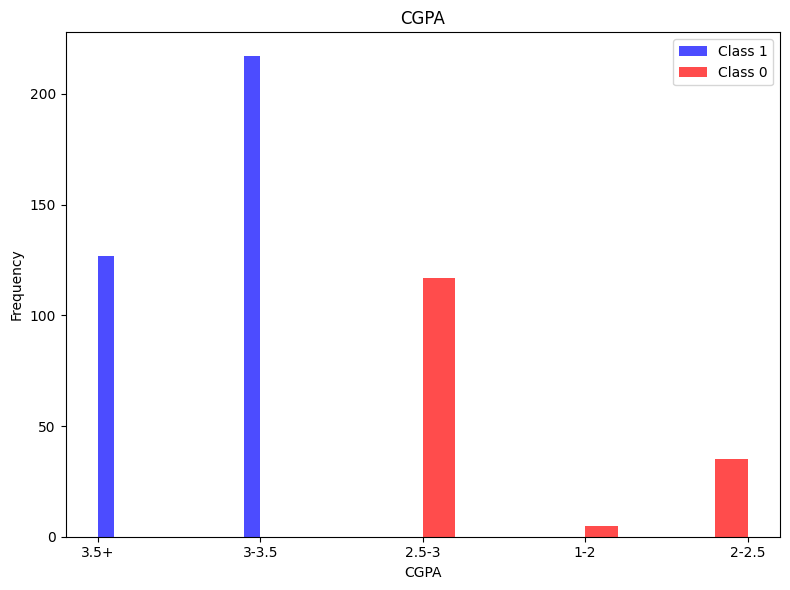

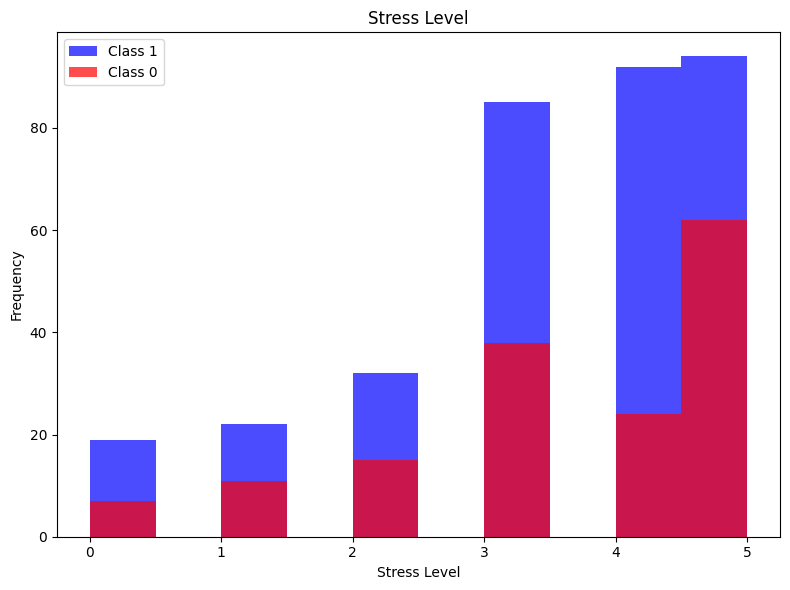

In [ ]:
for label in cols:
    if label == 'Attendence':
        # Convert the 'Attendence' column to numeric by taking the average of the range
        df['Attendence'] = df['Attendence'].apply(lambda x: np.mean([float(i) for i in x.split('-')]))

    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as needed

    ax.hist(df[df["class"] == 1][label], color='blue', label='Class 1', alpha=0.7)
    ax.hist(df[df["class"] == 0][label], color='red', label='Class 0', alpha=0.7)

    ax.set_title(label)
    ax.set_ylabel("Frequency")
    ax.set_xlabel(label)

    ax.legend()

    plt.tight_layout()  # Adjust the layout to prevent overlap
    plt.show()


In [ ]:
# Splitting the data into features (X) and target variable (y)
X = df.drop("class", axis=1)
y = df["class"]

In [ ]:
# One-hot encoding for categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[['Gender', 'University', 'Attendence', 'CGPA']]))
X_encoded.columns = encoder.get_feature_names_out(['Gender', 'University', 'Attendence', 'CGPA'])
X = pd.concat([X.drop(['Gender', 'University', 'Attendence', 'CGPA'], axis=1), X_encoded], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Identify columns to exclude from scaling (e.g., categorical or one-hot encoded columns)
exclude_columns = ['Year']

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(exclude='number').columns.tolist()

# Exclude non-numeric columns and columns in the exclude_columns list
columns_to_scale = [col for col in X.columns if col not in exclude_columns and col not in non_numeric_columns]

# Convert non-numeric values to numeric in specific columns
# For example, if 'Study' contains '<1', you can replace it with 0
X['Study Hours'] = pd.to_numeric(X['Study Hours'], errors='coerce').fillna(0)

# Scale and oversample the dataset
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)

In [ ]:
# Exclude non-numeric columns
numeric_columns = X_resampled.select_dtypes(include='number').columns.tolist()

# Create a new DataFrame with only numeric columns
X_numeric = X_resampled[numeric_columns]

In [ ]:
# kNN
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Apply cross-validation
cv_score1 = cross_val_score(knn_model, X_numeric, y_resampled, cv=5, scoring='accuracy')

In [ ]:
# Display cross-validation scores
print("Cross-validation scores:", cv_score1)
print("Mean accuracy:", np.mean(cv_score1))

Cross-validation scores: [0.91304348 0.92753623 0.89855072 0.96350365 0.9270073 ]
Mean accuracy: 0.9259282767375436


In [ ]:
# Train-test split (optional)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
print(f"Train:{len(X_train)}")

Train:550


In [ ]:
print(f"Test:{len(X_test)}")

Test:138


In [ ]:
# Print the column names in X_train
print("Columns in X_train:", X_train.columns)

# Check if 'University' is in the columns
if 'University' in X_train.columns:
    # One-hot encode the 'University' column
    X_train_encoded = pd.get_dummies(X_train, columns=['University'], drop_first=True)
else:
    print("The 'University' column is not present in X_train. Check the column names.")

Columns in X_train: Index(['Year', 'Interest', 'Support', 'Visit Resource', 'Announcement Check',
       'Class Participation', 'Study Hours', 'Group Study', 'Stress Level',
       'Gender_Male', 'University_AUST', 'University_BGMEA',
       'University_BRAC University', 'University_BUET', 'University_BUP',
       'University_Bangabandhu Sheikh Mujibur Rahman Agriculture University',
       'University_Bangabandhu Sheikh Mujibur Rahman Aviation and Aerospace University',
       'University_Bangladesh Home Economics College',
       'University_Bhawal Badre Alom Govt. College',
       'University_CUET, DU, HEU', 'University_City Medical College',
       'University_Comilla Medical College', 'University_DIU',
       'University_Dhaka Medical College',
       'University_Dhaladia Degree College',
       'University_Dream University of Bangladesh', 'University_EWU',
       'University_Eden Mohila College',
       'University_Gazipur Govt Mohila College',
       'University_Govt College of 

In [ ]:
X_train.head()

,Year,Interest,Support,Visit Resource,Announcement Check,Class Participation,Study Hours,Group Study,Stress Level,Gender_Male,...,University_University of Rajshahi,University_Uttara University,Attendence_17.5,Attendence_37.5,Attendence_62.5,Attendence_87.5,CGPA_2-2.5,CGPA_2.5-3,CGPA_3-3.5,CGPA_3.5+
278,0.0,-1.921639,0.046573,0.010018,0.175804,-1.059912,2.0,-1.447239,1.059354,0.815139,...,-0.089712,-0.044721,-0.163216,-0.247872,-0.461601,0.598100,-0.274057,-0.551985,1.144009,-0.582728
110,0.0,0.390790,0.824341,-0.826517,-2.248358,-0.289207,3.0,-0.120493,0.365581,-1.226784,...,-0.089712,-0.044721,-0.163216,-0.247872,2.166375,-1.671961,-0.274057,-0.551985,1.144009,-0.582728
82,0.0,0.390790,-2.286732,0.846553,0.983858,-2.601323,2.0,-1.447239,1.059354,0.815139,...,-0.089712,-0.044721,-0.163216,-0.247872,-0.461601,0.598100,-0.274057,-0.551985,1.144009,-0.582728
51,0.0,1.161599,0.824341,0.846553,-0.632250,0.481499,2.0,0.542880,1.059354,0.815139,...,-0.089712,-0.044721,-0.163216,-0.247872,-0.461601,0.598100,-0.274057,-0.551985,1.144009,-0.582728
218,0.0,-0.380020,0.824341,0.846553,0.983858,0.481499,2.0,-1.447239,0.365581,-1.226784,...,-0.089712,-0.044721,-0.163216,4.034335,-0.461601,-1.671961,-0.274057,-0.551985,1.144009,-0.582728


In [ ]:
# Identify non-numeric columns in X_train
non_numeric_columns_train = X_train.select_dtypes(exclude='number').columns.tolist()

# Check if there are any non-numeric columns
if non_numeric_columns_train:
    # Convert non-numeric values to numeric in specific columns
    for col in non_numeric_columns_train:
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce').fillna(0)

# Check if 'University' column is present in X_train
if 'University' in X_train.columns:
    # Check if 'University' column has string values
    if X_train['University'].dtype == 'O':
        # One-hot encode the 'University' column
        column_transformer = ColumnTransformer(
            transformers=[('encoder', OneHotEncoder(), ['University'])],
            remainder='passthrough'
        )
        X_train_encoded = pd.DataFrame(column_transformer.fit_transform(X_train[['University']]))
        X_train_encoded.columns = column_transformer.get_feature_names_out(['University'])
        X_train_encoded.index = X_train.index
        X_train = pd.concat([X_train.drop(['University'], axis=1), X_train_encoded], axis=1)

    # Fit the model on the training set
    knn_model.fit(X_train, y_train)
else:
    # If 'University' column is not present, fit the model directly on X_train
    knn_model.fit(X_train, y_train)


In [ ]:
# Save the kNN model weights
joblib.dump(knn_model, 'knn_model_weights.joblib')

['knn_model_weights.joblib']

In [ ]:
# Load the kNN model weights (for demonstration purposes)
loaded_knn_model = joblib.load('knn_model_weights.joblib')

In [ ]:
print(loaded_knn_model)

KNeighborsClassifier()


In [ ]:
X_numeric.head()

,Interest,Support,Visit Resource,Announcement Check,Class Participation,Study Hours,Group Study,Stress Level,Gender_Male,University_AUST,...,University_University of Rajshahi,University_Uttara University,Attendence_17.5,Attendence_37.5,Attendence_62.5,Attendence_87.5,CGPA_2-2.5,CGPA_2.5-3,CGPA_3-3.5,CGPA_3.5+
0,-1.150829,0.824341,-1.663052,0.175804,-1.830618,2.0,0.542880,-0.328192,-1.226784,-0.089712,...,-0.089712,-0.044721,-0.163216,-0.247872,-0.461601,0.5981,-0.274057,1.811643,-0.874119,-0.582728
1,-0.380020,0.046573,0.010018,0.983858,0.481499,2.0,0.542880,-0.328192,0.815139,-0.089712,...,-0.089712,-0.044721,-0.163216,-0.247872,-0.461601,0.5981,-0.274057,1.811643,-0.874119,-0.582728
2,1.161599,0.824341,0.010018,0.175804,0.481499,2.0,1.869626,-2.409510,0.815139,-0.089712,...,-0.089712,-0.044721,-0.163216,-0.247872,-0.461601,0.5981,-0.274057,-0.551985,-0.874119,1.716066
3,0.390790,0.046573,0.846553,0.983858,-1.830618,2.0,1.206253,0.365581,-1.226784,-0.089712,...,-0.089712,-0.044721,-0.163216,-0.247872,-0.461601,0.5981,-0.274057,-0.551985,1.144009,-0.582728
4,0.390790,0.824341,0.846553,-1.440304,0.481499,2.0,1.206253,-0.328192,0.815139,-0.089712,...,-0.089712,-0.044721,-0.163216,-0.247872,-0.461601,0.5981,-0.274057,-0.551985,1.144009,-0.582728


In [ ]:
y_resampled.unique()

array([0, 1])

In [ ]:
# Identify non-numeric columns in X_test
non_numeric_columns_test = X_test.select_dtypes(exclude='number').columns.tolist()

# Check if there are any non-numeric columns in X_test
if non_numeric_columns_test:
    # Convert non-numeric values to numeric in specific columns
    for col in non_numeric_columns_test:
        X_test[col] = pd.to_numeric(X_test[col], errors='coerce').fillna(0)

# Make predictions on the train & test set
y_pred1 = knn_model.predict(X_train)
y_pred2 = knn_model.predict(X_test)

# Evaluate the model on the train set
print("\nTrain Set Evaluation:")
print(classification_report(y_train, y_pred1))
# Evaluate the model on the test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred2))



Train Set Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       286
           1       0.96      0.94      0.95       264

    accuracy                           0.95       550
   macro avg       0.96      0.95      0.95       550
weighted avg       0.95      0.95      0.95       550


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        58
           1       0.96      0.89      0.92        80

    accuracy                           0.91       138
   macro avg       0.91      0.92      0.91       138
weighted avg       0.92      0.91      0.91       138



In [ ]:
decision_model = DecisionTreeClassifier(random_state=42)

In [ ]:
# Apply cross-validation
cv_score2 = cross_val_score(decision_model, X_numeric, y_resampled, cv=5, scoring='accuracy')

In [ ]:
# Display cross-validation scores
print("Cross-validation scores:", cv_score2)
print("Mean accuracy:", np.mean(cv_score2))

Cross-validation scores: [0.98550725 0.97101449 0.98550725 1.         0.97810219]
Mean accuracy: 0.9840262350576537


In [ ]:
# Train the model
decision_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the train & test set
y_pred3 = decision_model.predict(X_train)
y_pred4 = decision_model.predict(X_test)

# Evaluate the model on the train set
print("\nTrain Set Evaluation:")
print(classification_report(y_train, y_pred3))
# Evaluate the model on the test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred4))


Train Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       264

    accuracy                           1.00       550
   macro avg       1.00      1.00      1.00       550
weighted avg       1.00      1.00      1.00       550


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       1.00      0.97      0.99        80

    accuracy                           0.99       138
   macro avg       0.98      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138



In [ ]:
# Save the decision tree model weights
joblib.dump(decision_model, 'decision_model_weights.joblib')

['decision_model_weights.joblib']

In [ ]:
# Load the kNN model weights (for demonstration purposes)
loaded_decision_model = joblib.load('decision_model_weights.joblib')

In [ ]:
# Create an SVM model
SVM_model = SVC(kernel='linear', C=1.0, random_state=42)

In [ ]:
# Apply cross-validation
cv_score3 = cross_val_score(SVM_model, X_numeric, y_resampled, cv=5, scoring='accuracy')

In [ ]:
# Display cross-validation scores
print("Cross-validation scores:", cv_score3)
print("Mean accuracy:", np.mean(cv_score3))

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0


In [ ]:
SVM_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
joblib.dump(SVM_model, 'SVM_model_weights.joblib')

['SVM_model_weights.joblib']

In [ ]:
loaded_SVM_model = joblib.load('SVM_model_weights.joblib')

In [ ]:
# Make predictions on the train & test set
y_pred5 = SVM_model.predict(X_train)
y_pred6 = SVM_model.predict(X_test)

# Evaluate the model on the train set
print("\nTrain Set Evaluation:")
print(classification_report(y_train, y_pred5))
# Evaluate the model on the test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred6))


Train Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       264

    accuracy                           1.00       550
   macro avg       1.00      1.00      1.00       550
weighted avg       1.00      1.00      1.00       550


Test Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        80

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [ ]:
# Initialize Gaussian Naive Bayes classifier
nb_model = GaussianNB()


In [ ]:
# Apply cross-validation
cv_score4 = cross_val_score(nb_model, X_numeric, y_resampled, cv=5, scoring='accuracy')

In [ ]:
# Display cross-validation scores
print("Cross-validation scores:", cv_score4)
print("Mean accuracy:", np.mean(cv_score4))

Cross-validation scores: [1.         1.         0.97101449 1.         1.        ]
Mean accuracy: 0.9942028985507246


In [ ]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Save the decision tree model weights
joblib.dump(nb_model, 'nb_model_weights.joblib')

['nb_model_weights.joblib']

In [ ]:
# Load the kNN model weights (for demonstration purposes)
loaded_nb_model = joblib.load('nb_model_weights.joblib')

In [ ]:
# Make predictions on the train & test set
y_pred7 = nb_model.predict(X_train)
y_pred8 = nb_model.predict(X_test)

# Evaluate the model on the train set
print("\nTrain Set Evaluation:")
print(classification_report(y_train, y_pred7))
# Evaluate the model on the test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred8))


Train Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       264

    accuracy                           1.00       550
   macro avg       1.00      1.00      1.00       550
weighted avg       1.00      1.00      1.00       550


Test Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        80

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [ ]:
# Initialize Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Apply cross-validation
cv_score5 = cross_val_score(rf_model, X_numeric, y_resampled, cv=5, scoring='accuracy')

In [ ]:
# Display cross-validation scores
print("Cross-validation scores:", cv_score5)
print("Mean accuracy:", np.mean(cv_score5))

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0


In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Save the random forest model weights
joblib.dump(rf_model, 'rf_model_weights.joblib')

['rf_model_weights.joblib']

In [ ]:
# Load the kNN model weights (for demonstration purposes)
rf_model = joblib.load('rf_model_weights.joblib')

In [ ]:
# Make predictions on the train & test set
y_pred9 = rf_model.predict(X_train)
y_pred10 = rf_model.predict(X_test)

# Evaluate the model on the train set
print("\nTrain Set Evaluation:")
print(classification_report(y_train, y_pred9))
# Evaluate the model on the test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred10))


Train Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       264

    accuracy                           1.00       550
   macro avg       1.00      1.00      1.00       550
weighted avg       1.00      1.00      1.00       550


Test Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        80

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [ ]:
# Initialize Logistic Regression model
regression_model = LogisticRegression(random_state=42)


In [ ]:
# Apply cross-validation
cv_score6 = cross_val_score(regression_model, X_numeric, y_resampled, cv=5, scoring='accuracy')

In [ ]:
# Display cross-validation scores
print("Cross-validation scores:", cv_score6)
print("Mean accuracy:", np.mean(cv_score6))

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0


In [ ]:
regression_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Save the decision tree model weights
joblib.dump(regression_model, 'regression_model_weights.joblib')

['regression_model_weights.joblib']

In [ ]:
# Load the kNN model weights (for demonstration purposes)
loaded_decision_model = joblib.load('regression_model_weights.joblib')

In [ ]:
# Make predictions on the train & test set
y_pred11 = regression_model.predict(X_train)
y_pred12 = regression_model.predict(X_test)

# Evaluate the model on the train set
print("\nTrain Set Evaluation:")
print(classification_report(y_train, y_pred11))
# Evaluate the model on the test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred12))


Train Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       264

    accuracy                           1.00       550
   macro avg       1.00      1.00      1.00       550
weighted avg       1.00      1.00      1.00       550


Test Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        80

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



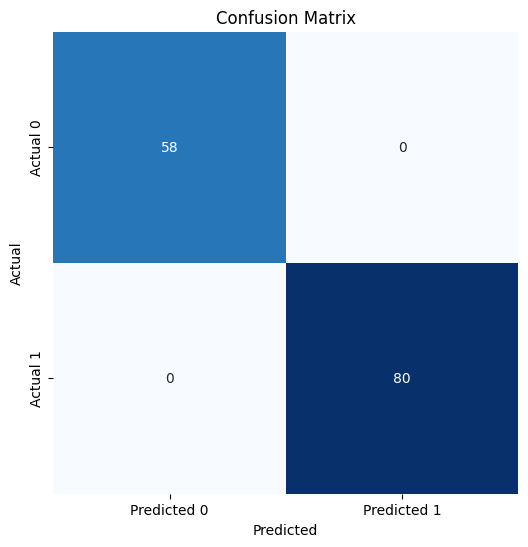

In [ ]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred12)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()